# Run the whole deltas algorithm

In [139]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
# import deltas
import model_deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [140]:
N1 = 10000
N2 = 10
data_clf = pipeline.get_data(
    m1=[-5, -5],
    m2=[10, 10],
    cov1=[[10, 0], [0, 10]],
    cov2=[[50, 0], [0, 50]],
    N1=N1,
    N2=N2,
    scale=True)


## Get Classifier

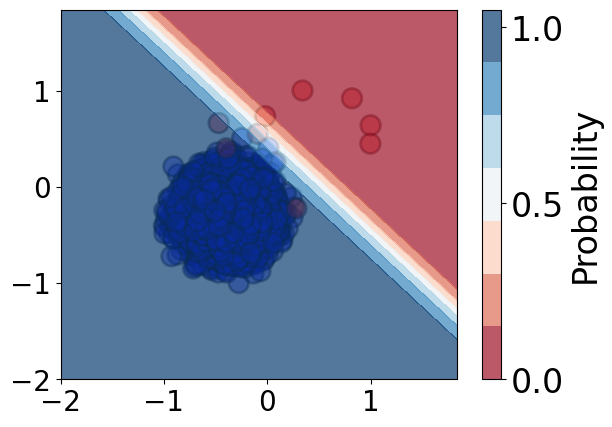

In [141]:
model = 'SVM'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'] = pipeline.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

In [142]:
clf = data_clf['clf']
clf.get_projection([[1, 1]]) #- clf.intercepts_[-1]

array([[1.41421346]])

## Fit deltas

deltas init: [1, 0.005806882864997053]
eq. 7 can be satisfied: False
constraint init: False
Grid Search Optimisation Complete
    delta1 : 1e-15 
    delta2: 0.002413569560546445
    constraint satisfied: False


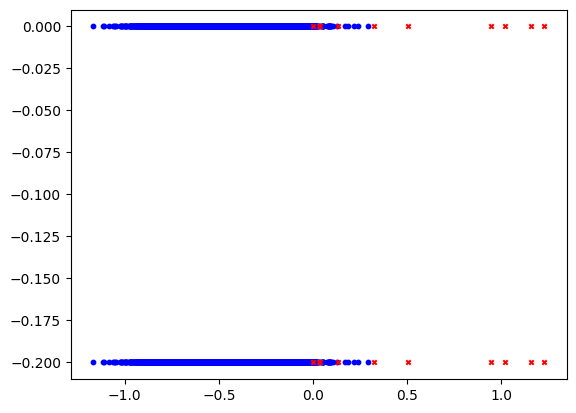

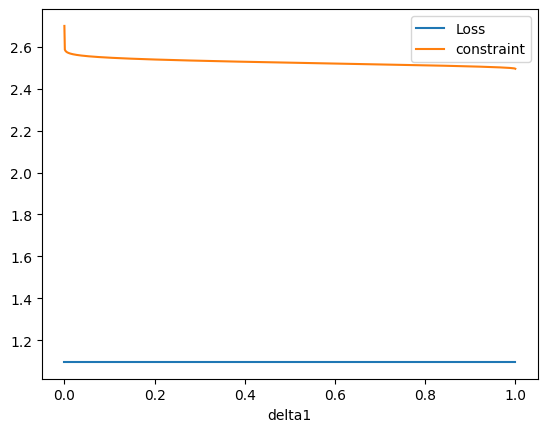

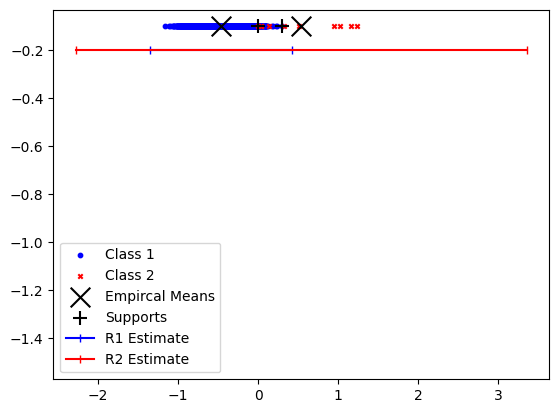

In [143]:
X = data_clf['data']['X']
y = data_clf['data']['y']
deltas_model = model_deltas.SVM_deltas(clf).fit(X, y, _print=True, _plot=True)

## Plot training data information

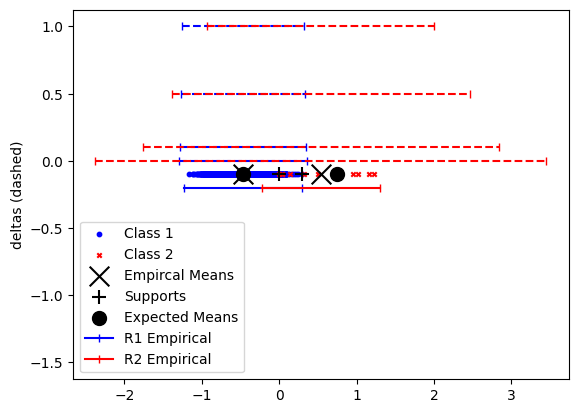

In [144]:
deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])

## Show parameters

In [145]:
deltas_model.print_params()

Parameters
                R:  1.229507499878329
                N1: 10000
                N2: 10
                R1: 0.7616469243880449
                R2: 0.6899855426455821
                M:  0.29277110543235985
                D:  1.006173731634385
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.8059
deltas   accuracy: 0.50235


original F1: 0.7591512594614716
deltas   F1: 0.6677127499749608


original precision: 1.0
deltas   precision: 0.5011777677542224




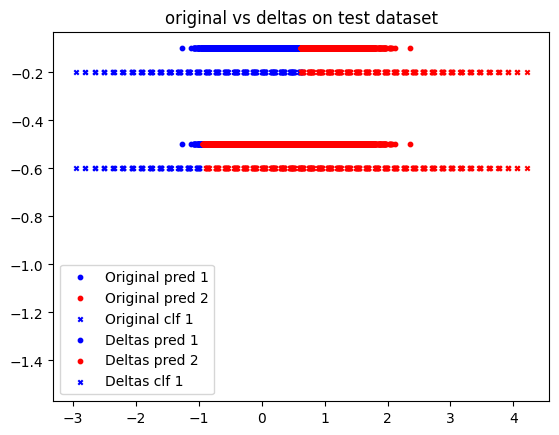

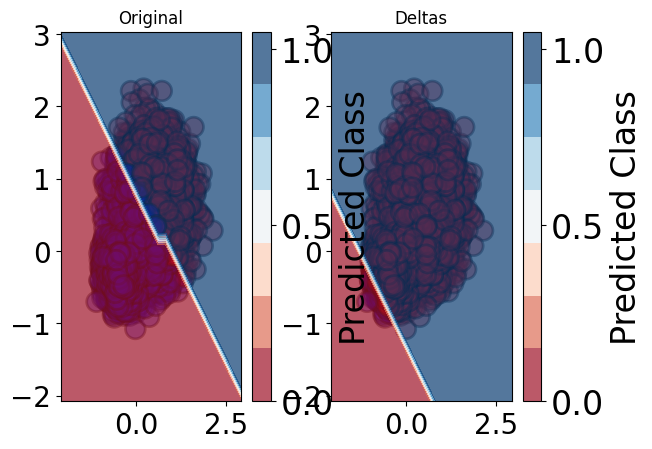

In [146]:
pipeline.eval_test_new(clf, deltas_model,
                       data_clf['data_test'], _print=True, _plot=True)